In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import warnings
from scipy.stats import norm

import sys
sys.path.append('../')
import src as src

In [2]:
import scipy as sp
import pandas as pd

## Markov Chains

In [3]:
mc = src.MarkovChain(np.array([[0.99,0.01],[0.2,0.8]]),np.array([0,1]))
mc.iterate(1, set_state=True)
mc.state_vector
mc.transition_matrix
mc.forecast([5,1,7,123,45,0])

array([[0.72086909, 0.27913091],
       [0.358     , 0.642     ],
       [0.8078944 , 0.1921056 ],
       [0.95238095, 0.04761905],
       [0.95236235, 0.04763765],
       [0.2       , 0.8       ]])

In [4]:
mc.iterate(2)

../src/markov.py:122: UserWarning: state vector probabilities rounded to 8 digits
  warnings.warn('state vector probabilities rounded to 8 digits')


In [5]:
mc.steady_state()

array([0.95238095, 0.04761905])

In [6]:
mc.expected_durations()

array([100.,   5.])

In [7]:
mc.entropy()

array(0.72192809)

## Distributions

In [8]:
fac1 = src.NormalDistribution(1.1, 2)
fac2 = src.NormalDistribution(1.1, 5)
factors = [fac1, fac2]

In [9]:
isinstance(fac1, src.BaseDistribution)

True

In [10]:
isinstance(fac1, src.NormalDistribution)

True

In [11]:
src.ProductDistribution(factors).mean(), np.array(src.ProductDistribution(factors).rvs(100000)).mean()

(1.2100000000000002, 1.2186759796158178)

In [12]:
src.ProductDistribution(factors).std(), np.array(src.ProductDistribution(factors).rvs(100000)).std()

(11.62282237668631, 11.547593195716336)

In [13]:
import scipy as sp
(src.ProductDistribution(factors).skew(), sp.stats.skew(src.ProductDistribution(factors).rvs(100000)))

(0.46238295716396305, 0.41775628222426536)

In [14]:
(src.ProductDistribution(factors).kurt(), sp.stats.kurtosis(src.ProductDistribution(factors).rvs(1000000)))

(5.595171030073189, 5.640818971771198)

## Models

In [15]:
src.NormalModel(mu=0, sigma=1).pdf(2)

0.05399096651318806

In [16]:
mm = src.MixtureModel()

## HMM Model

In [19]:
models = (src.NormalModel(1.07, 0.15), src.NormalModel(1.01, 0.4))
trans_mat = np.array([[0.99,0.01],
                      [0.05,0.95]])
state_vec = [0, 1]
hmm = src.HiddenMarkovModel(transition_matrix=trans_mat, state_vector=state_vec, emission_models=models)

i=0

1


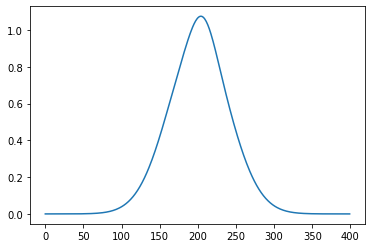

In [20]:
i+=1
pd.Series(hmm.iterate(i).pdf(np.arange(-1,3,0.01))).plot()
print(i)

In [21]:
mdls = (src.NormalModel(0.8,0.2), src.NormalModel(1.2,1))
hmm = src.HiddenMarkovModel(transition_matrix=np.array([[0.99,0.01],[0.2,0.8]]), state_vector=[0.5,0.5], emission_models=mdls)
#hmm.mixture_distribution()
hmm.emission_models

(<src.models.NormalModel at 0x7f573630f6d8>,
 <src.models.NormalModel at 0x7f573630f710>)

In [22]:
hmm.iterate(2).state_vector

array([[0.67005, 0.32995]])

In [23]:
hmm.iterate(2).exkurt()

1.4139433130576027

In [24]:
hmm.iterate(2).entropy()

0.9148752798696143

In [25]:
## add product distribution moments
hmm.product_distribution(horizon=3).mean()

0.8143176744895921

<AxesSubplot:>

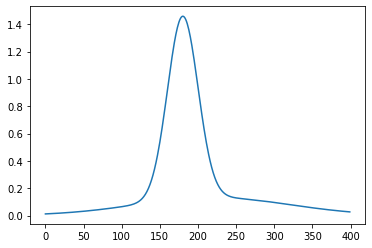

In [26]:
pd.Series(hmm.iterate(2).pdf(np.arange(-1,3,0.01))).plot()

In [27]:
comps = [(src.NormalDistribution(0,1), 0.5), (src.NormalDistribution(1,1), 0.5)]
mix = src.MixtureDistribution(comps)

In [28]:
mdls = [src.NormalModel(0,1), src.NormalModel(1,1)]
Y = sp.stats.norm(0.5,2).rvs(100)
hmm = src.HiddenMarkovModel(emission_models=mdls)
hmm.fit(Y)
hmm.component_stds()
hmm.transition_matrix

../src/hmm.py:120: UserWarning: maximum number of iterations reached
  warnings.warn('maximum number of iterations reached')
../src/hmm.py:350: UserWarning: Transition matrix rounded to 6 decimal places
  warnings.warn('Transition matrix rounded to 6 decimal places')


array([[0.452681, 0.547319],
       [0.449215, 0.550785]])

In [29]:
m = src.MarkovChain()
hasattr(m, 'transition_matrix')


True

In [30]:
np.full(2, 1).

SyntaxError: invalid syntax (<ipython-input-30-d3380b8d88a8>, line 1)

In [33]:
hmm.components

[(<src.dists.NormalDistribution at 0x7f5736396d30>, 0.4506923184851965),
 (<src.dists.NormalDistribution at 0x7f5736396cf8>, 0.5493076815148036)]

In [38]:
Y = sp.stats.norm(0.5,2).rvs(10)
print(hmm.emission_models[0].mu, hmm.emission_models[1].mu)
print(hmm.emission_models[0].sigma, hmm.emission_models[1].sigma)
print(hmm.state_vector)
hmm._estimate_baum_welch(Y, max_iter=100, return_fit=True)

1.2117960184514176 -0.8465945408202131
1.630439705784666 2.083252469003692
[[0.16375391 0.83624609]]


(<src.hmm.HiddenMarkovModel at 0x7f57362b92e8>,
 {'converged': True,
  'iterations': 78,
  'scores': {0: -20.335508662401402,
   1: -17.892900457018424,
   2: -18.234853346604744,
   3: -18.686418314539885,
   4: -18.637606607890582,
   5: -18.809663129882676,
   6: -18.72247955111396,
   7: -18.777920237816872,
   8: -18.7407706784972,
   9: -18.750279469465454,
   10: -18.73646646723119,
   11: -18.733367865878495,
   12: -18.726277139867925,
   13: -18.72137194041044,
   14: -18.716571047141667,
   15: -18.712506630568164,
   16: -18.70910778679536,
   17: -18.706211590217706,
   18: -18.70387302508155,
   19: -18.7019151672138,
   20: -18.700338969867776,
   21: -18.699031801988582,
   22: -18.697971557845094,
   23: -18.697092715529852,
   24: -18.696372172747083,
   25: -18.695772118184884,
   26: -18.695274618827796,
   27: -18.694857439747395,
   28: -18.694507923864247,
   29: -18.69421261908882,
   30: -18.693962873872472,
   31: -18.693750297941346,
   32: -18.69356901819265

In [40]:
hmm.fit(Y)

In [45]:
hmm.smooth_prob_#.shape

AttributeError: 'HiddenMarkovModel' object has no attribute 'smooth_prob_'

[2.2031202356936888, 2.2049647280660087] [4.946150136222969, 4.9451803747449725]
True
[[0.826899 0.173101]
 [0.084846 0.915154]]


../src/hmm.py:350: UserWarning: Transition matrix rounded to 6 decimal places
  warnings.warn('Transition matrix rounded to 6 decimal places')


<AxesSubplot:>

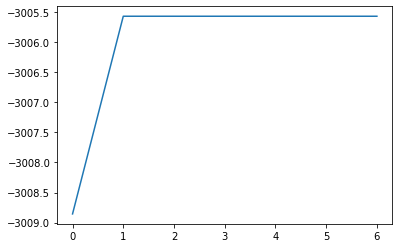

In [55]:
Y = sp.stats.norm(2,5).rvs(1000)
print(hmm.component_means(), hmm.component_stds())
hmm, fit = hmm._estimate_baum_welch(Y, max_iter=500, return_fit=True)
print(fit['converged'])
print(hmm.transition_matrix)
pd.Series(fit['scores']).plot()

<AxesSubplot:>

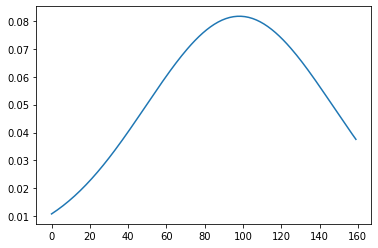

In [56]:
pd.Series(hmm.distribution.pdf(np.arange(-8,8,0.1))).plot()

In [57]:
hmm.iterate(1)

## Other Simulation

In [58]:
sample_1 = pd.DataFrame(sp.stats.multivariate_normal(mean=[1.1, 1.1], cov=[[0.2, 0.1],[0.1, 0.2]]).rvs(10000))

In [59]:
sample_1.corr()

,0,1
0,1.000000,0.499912
1,0.499912,1.000000


In [60]:
sample_1.cov()

,0,1
0,0.199752,0.099412
1,0.099412,0.197970


In [61]:
l = 20
_ = pd.DataFrame(sp.stats.multivariate_normal(mean=[1.1, 1.1], cov=[[0.2, 0.1],[0.1, 0.2]]).rvs(10000*l))
sample_2 = _.groupby(_.index // l).prod()

In [62]:
sample_2.corr()

,0,1
0,1.000000,0.156038
1,0.156038,1.000000


In [63]:
sample_2.cov()

,0,1
0,660.859694,135.690444
1,135.690444,1144.265391


In [64]:
from scipy.io import loadmat
loadmat('ex4data1.mat').keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])